In [3]:
!pip install -q kaggle

In [ ]:
!rm -rf /content/data/final_dataset

In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22300        617  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1065         28  1.0              
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2562         59  1.0              
darshanprabhu09/stock-prices-f

In [6]:
! kaggle datasets download -d alfiankafilahbaits/capstone

100% 796M/796M [00:28<00:00, 32.5MB/s]
100% 796M/796M [00:28<00:00, 29.3MB/s]


In [12]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import zipfile

In [9]:
# extracting data from zip
local_zip = 'capstone.zip'
target_extraction = './data/'
file_check = "ISIC_Labelled"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)
        zip_ref.close()
#if data is already extracted it will instead print file already extracted
except FileNotFoundError:
    print('Zip File Not Found!')

In [ ]:
path = './data/data_2/ISIC_Labelled'

dir_new = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
dir_old = ['Melanoma', 'Melanocytic nevus', 'Basal cell carcinoma', 'Actinic keratosis', 'Benign keratosis', 'Dermatofibroma', 'Vascular lesion', 'Squamous cell carcinoma']

counter = 0

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    name = os.path.splitext(filename)
    
    for i, x in enumerate(dir_old):
        if x in name:
            postfix = dir_new[i]
            new_name = os.path.join(path, postfix)
            os.rename(file_path, new_name)
            continue
    counter += 1

In [13]:
path = '/content/dataset/'
counter = 0
dir_names=['melanoma', 'melanocytic_nevus', 'basal_cell_carcinoma', 'actinic_keratosis', 'benign_keratosis','squamous_cell_carcinoma', 'dermatofibroma', 'vascular_lesions']

for file in (dir_names):
    dir = os.listdir(f"{path}/{file}")
    
    print(f"Data for {file} is {len(dir)}")

Data for melanoma is 300
Data for melanocytic_nevus is 316
Data for basal_cell_carcinoma is 300
Data for actinic_keratosis is 300
Data for benign_keratosis is 300
Data for squamous_cell_carcinoma is 300
Data for dermatofibroma is 141
Data for vascular_lesions is 179


In [14]:
!pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
dir_names=['melanoma', 'melanocytic_nevus', 'basal_cell_carcinoma', 'actinic_keratosis', 'benign_keratosis','squamous_cell_carcinoma', 'dermatofibroma', 'vascular_lesions']
import Augmentor
for i in dir_names:
    p = Augmentor.Pipeline(f"/content/dataset/{i}", output_directory=f'/data/final_dataset/{i}')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.crop_random(probability=0.5, percentage_area=0.8)
    p.resize(probability=1.0, width=150, height=150)
    p.sample(800) 

Initialised with 300 image(s) found.
Output directory set to /data/final_dataset/melanoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFBC01DBEB0>: 100%|██████████| 800/800 [01:18<00:00, 10.17 Samples/s]


Initialised with 316 image(s) found.
Output directory set to /data/final_dataset/melanocytic_nevus.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFBC01DBF40>: 100%|██████████| 800/800 [01:10<00:00, 11.29 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /data/final_dataset/basal_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFBC3EE82B0>: 100%|██████████| 800/800 [01:50<00:00,  7.25 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /data/final_dataset/actinic_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFC4EFDF700>: 100%|██████████| 800/800 [01:15<00:00, 10.57 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /data/final_dataset/benign_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFBC022BC70>: 100%|██████████| 800/800 [00:51<00:00, 15.61 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /data/final_dataset/squamous_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFBC4026FE0>: 100%|██████████| 800/800 [01:04<00:00, 12.42 Samples/s]


Initialised with 141 image(s) found.
Output directory set to /data/final_dataset/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFBC526A440>: 100%|██████████| 800/800 [01:05<00:00, 12.30 Samples/s]


Initialised with 179 image(s) found.
Output directory set to /data/final_dataset/vascular_lesions.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7EFBC022B760>: 100%|██████████| 800/800 [00:52<00:00, 15.32 Samples/s]


In [13]:
output_dir = pathlib.Path('/content/final/final_dataset/')
image_count_train = len(list(output_dir.glob('*/*.jpg')))
print(image_count_train)


6400


In [17]:
training_main = pathlib.Path('/content/final/final_dataset/')

In [18]:
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(150, 150),
  batch_size=batch_size)

Found 6400 files belonging to 8 classes.
Using 5120 files for training.


In [19]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(150,150),
  batch_size=batch_size)

Found 6400 files belonging to 8 classes.
Using 1280 files for validation.


In [20]:
validation_size = int(0.5 * val_ds.cardinality().numpy())
test_ds = val_ds.take(validation_size)
val_ds = val_ds.take(validation_size)

In [21]:
print("Training Set Size: %d" % train_ds.cardinality().numpy())
print("Validation Set Size: %d" % val_ds.cardinality().numpy())
print("Test Set Size: %d" % test_ds.cardinality().numpy())

Training Set Size: 160
Validation Set Size: 20
Test Set Size: 20


NameError: ignored

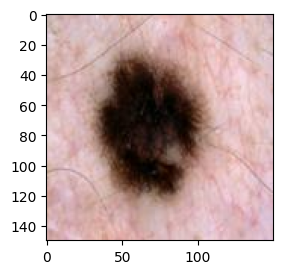

In [22]:
plt.figure(figsize=(10, 10))
for image, label in val_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(dir_names[label[i]])
        plt.axis("off")

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
IMG_SIZE = (150,150)
IMG_SHAPE = IMG_SIZE + (3,)
resnet50 = tf.keras.applications.resnet50
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

In [ ]:
conv_model.trainable = False

In [ ]:
conv_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
def data_augmenter ():
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        ])
    
    return data_augmentation

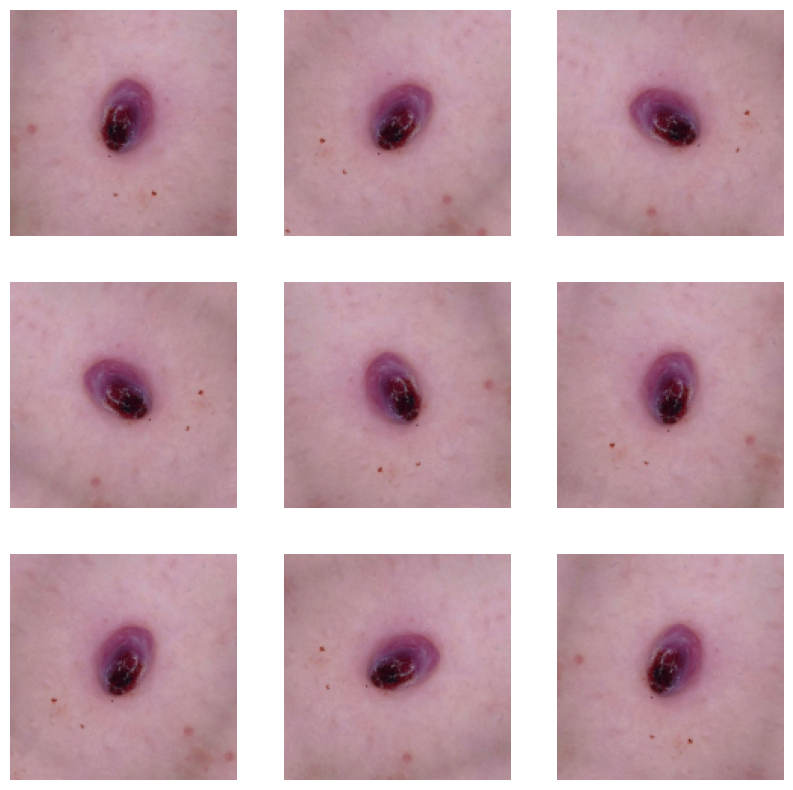

In [ ]:
data_augmentation = data_augmenter()

for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = conv_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(conv_model.output)

predictions = tf.keras.layers.Dense(8, activation='softmax')(x)
full_model = tf.keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']         

In [83]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
model_name='EfficientNetB5'
base_model=tf.keras.applications.EfficientNetB1(include_top=False, weights="imagenet",input_shape=IMG_SHAPE, pooling='max') 
x=base_model.output
x=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(64, kernel_regularizer = regularizers.l2(l = 0.050),activity_regularizer=regularizers.l1(0.06),
                bias_regularizer=regularizers.l1(0.06) ,activation='relu')(x)
x=Dropout(rate=0.3, seed=123)(x)        
output=Dense(8, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
#model.compile(Adamax(learning_rate=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [84]:
base_learning_rate = 0.001

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adamax(learning_rate=base_learning_rate),
                  metrics=['accuracy'])

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)

In [86]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.88: # @KEEP
                print("\nReached 89% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True
                
callbacks = myCallback()

In [89]:
initial_epochs = 10
history6 =model.fit(train_ds, validation_data=val_ds, validation_steps=int(0.2*len(val_ds)), epochs=initial_epochs, callbacks=[callbacks])

Epoch 1/10
  6/160 [>.............................] - ETA: 33s - loss: 0.6303 - accuracy: 1.0000

160/160 [==============================] - 36s 227ms/step - loss: 0.6575 - accuracy: 0.9867 - val_loss: 0.9795 - val_accuracy: 0.8516
Epoch 2/10
160/160 [==============================] - 36s 227ms/step - loss: 0.6255 - accuracy: 0.9885 - val_loss: 1.0030 - val_accuracy: 0.8125
Epoch 3/10
160/160 [==============================] - 36s 228ms/step - loss: 0.5916 - accuracy: 0.9898 - val_loss: 0.9086 - val_accuracy: 0.8594
Epoch 4/10
160/160 [==============================] - 36s 228ms/step - loss: 0.5771 - accuracy: 0.9850 - val_loss: 0.9062 - val_accuracy: 0.8516
Epoch 5/10
160/160 [==============================] - ETA: 0s - loss: 0.5535 - accuracy: 0.9883
Reached 99% accuracy so cancelling training!
160/160 [==============================] - 37s 229ms/step - loss: 0.5535 - accuracy: 0.9883 - val_loss: 0.8068 - val_accuracy: 0.8906


In [90]:
model.save('./model_weights/skin_model(val acc > 89).h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

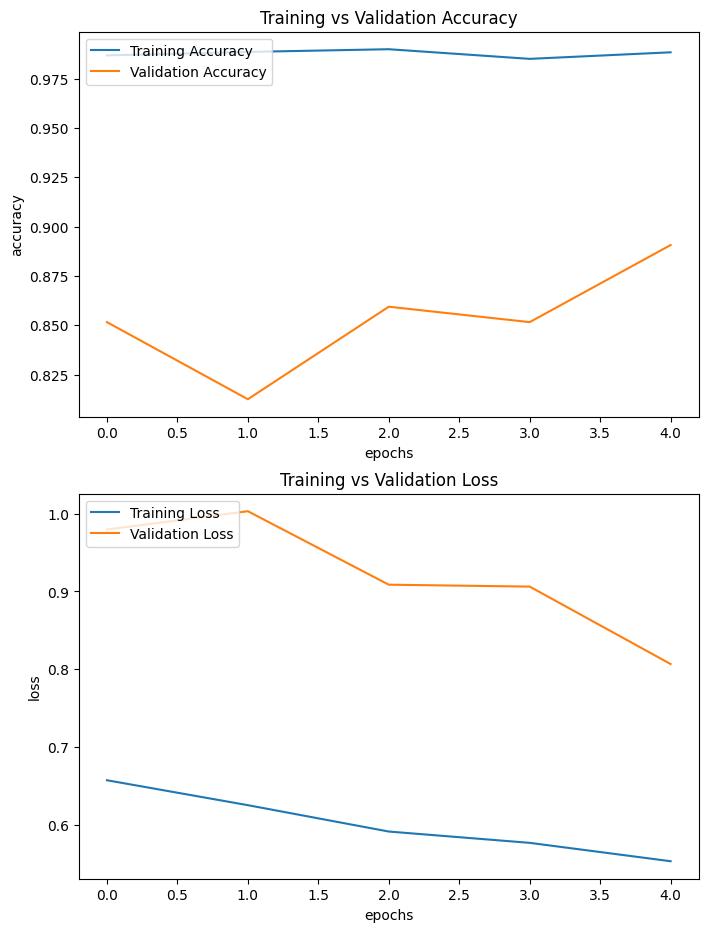

In [92]:

acc = history6.history['accuracy']
loss = history6.history['loss']
val_acc = history6.history['val_accuracy']
val_loss = history6.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')

In [2]:
%tensorflow_version 2.9

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.0


In [31]:
model.evaluate(test_ds)

20/20 [==============================] - 1s 64ms/step - loss: 1.3456 - accuracy: 0.7750


[1.3456273078918457, 0.7749999761581421]